# Digital Image Processing - HW2 - 98722278 - Mohammad Doosti Lakhani
In this notebook, I have solved the assignment's problems which are as follows:

1. Give short answers to below questions:
    1. How many zeros are needed to have a `same` convolution over a `256x256` with a `5x5` filter?
    2. What is the requirement of being **Separable Kernels**?
    3. How much speed-up will be up obtained if we use separated kernels of a `31x31` kernel?
2. Write the separated kernels of the below filter and explain what they will do. 
  \begin{bmatrix}
   -1 & 0 & 1 \\
   -2 & 0 & 2 \\
   -1 & 0 & 1
  \end{bmatrix}
  1. Instrcutions to obtain separated kernels
  2. What is their jobs?

3. Calculate below three tasks on paper:
    1. Compute the norm of following vectors:
  \begin{equation*}
    x=
  \begin{bmatrix}
   1+j \\
   2 \\
   1-j
  \end{bmatrix}
  , 
  y=
  \begin{bmatrix}
   1 \\
   -1 \\
   1
  \end{bmatrix}
  \end{equation*}
  
  2. Calculate the inner product of `x` and `y`. Are they orthonormal?
  
  3. Find degree between two following vectors:
  \begin{equation*}
    x=
  \begin{bmatrix}
   1 \\
   j \\
   1-j
  \end{bmatrix}
  , 
  y=
  \begin{bmatrix}
   -1 \\
   -j \\
   j-1
  \end{bmatrix}
  \end{equation*}
4. Implement functions described in the following tasks:
    1. Implement `make_gaussian` regarding 3.36 formula in reference book. Note that `size` is same (`size*size`) and the output filter must be 2D with arbitary `size` and `std`.
    2. Implement `convolve2d` with respect to the given `image` and `kernel`. You can use 3.35 formula in reference book.
    3. Wrap up `median` and `gaussian` built-in functions from `cv2` in predefined functions.
    4. Discuss the outputs using provided code and indicate the time they consumed.

## 1 Short Answers
1. How many zeros are needed to have a `same` convolution over a `256x256` with a `5x5` filter?
2. What is the requirement of being **Separable Kernels**?
3. How much speed-up will be up obtained if we use separated kernels of a `31x31` kernel?

### 1.A
Firstly, We use following formula to calculate `p` or **padding size**: 
\begin{equation*}
x_n = \lfloor{x_o - f + 2p} \rfloor + 1
\end{equation*}

Then we can get number of zeros using this formula:
\begin{equation*}
nz = 4x_n + 4y_n + 4p^2
\end{equation*}

In [2]:
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt

In [8]:
image_size = 256
image_size_new = image_size
filter_size = 5
p = (image_size_new - image_size -1 + filter_size) // 2
x = np.ones((image_size, image_size))
f = np.ones((filter_size, filter_size))
x_padded = np.pad(x, p, mode='constant')
print(x_padded.shape)
print('Number of zeros from "np.pad" functio:',len(x_padded.flatten()) - len(x_padded.nonzero()[0]))

nz = 4*image_size_new + 4*image_size_new + 4*p**2
print('Number of zeros:', nz)

(260, 260)
Number of zeros from "np.pad" functio: 2064
Number of zeros: 2064


### 1.B Separable Kernels

We know the output matrices of the result of producting a **row** and a **column** matrix is _**rank 1**_. So the only requirement of being **separable** is that the **kernel itself must be rank 1**.
Here is an example:

\begin{equation*}
x=
\begin{bmatrix}
    1 \\
    1
\end{bmatrix}
.
y=
\begin{bmatrix}
    1 & 1 & 1
\end{bmatrix}=
\begin{bmatrix}
    1 & 1 & 1 \\
    1 & 1 & 1
\end{bmatrix}
\end{equation*}

In [9]:
print('Rank of aforementioned matrix:',np.linalg.matrix_rank([[1, 1, 1], [1, 1, 1]]))

Rank of aforementioned matrix: 1


### 1.C Speed Up of Separable Kernels
We follow this formula which exists in reference book: 
\begin{equation*}
speed = \frac{MNmn}{MNm+MNn} = \frac{mn}{m+n}
\end{equation*}

In [11]:
f = 31
speed = f*f / (f+f)
print('Speed up {}x'.format(speed))

Speed up 15.5x


## 2 Functionality of Separable Kernels of Kernel so-called Sobel

  \begin{bmatrix}
   -1 & 0 & 1 \\
   -2 & 0 & 2 \\
   -1 & 0 & 1
  \end{bmatrix}
1. Getting Separable Kernels
2. Functionalities

### 2.A Getting Separable Kernels
1. Choose any non-zero random number from the given matrix and call it `E`
2. Get `E`'s column as it is and call it `V`
3. Get `E`'s row and call it `r`
4. Calculate `omega = r/E`, `V` and `omega` are the kernels
5. You can get original kernel by calculating `w = V * omega`.

In [31]:
kernel = np.array(
    [[-1, 0, 1],
     [-2, 0, 2],
     [-1, 0, 1]])
E_index = kernel.nonzero()[0][0], kernel.nonzero()[1][0]
V = kernel[:,E_index[1]].reshape(-1,1)
r = kernel[E_index[0],:].reshape(1,-1)
omega = r/kernel[E_index]
w = omega * V
print(w)
print(w.all() == kernel.all())

[[-1.  0.  1.]
 [-2.  0.  2.]
 [-1.  0.  1.]]
True


### 2.B Functionalities
1. First Kernel
\begin{bmatrix}
   -1 \\
   -2 \\
   -1
  \end{bmatrix}
2. Second Kernel
\begin{bmatrix}
   -1 \\
   0 \\
   1
  \end{bmatrix}

#### 2.B.a

\begin{bmatrix}
   -1 \\
   -2 \\
   -1
  \end{bmatrix}

[[  30.   30.  150.]
 [ 150.   30.  150.]
 [ 150.   30.   30.]]
[[ 120.  240.  255.]
 [ 255.  255.  255.]
 [ 255.  240.  120.]]


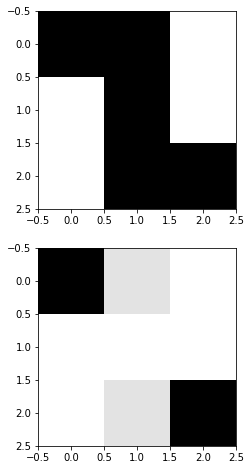

In [32]:
r = 150
x = np.array([[r/5, r/5 , r],
            [r,r/5, r],
            [r, r/5 , r/5]
])
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(5, 8))
ax[0].imshow(x, cmap='gray')
x_conv = ndimage.convolve(x, [[1,2,1]])
x_conv[x_conv > 255] = 255 
ax[1].imshow(x_conv, cmap='gray')
print(x)
print(x_conv)

**Smoothes the image** (decreases the frequency) for example decreasing the diffrenece from 5x to 2x.

#### 2.B.b
\begin{bmatrix}
   -1 \\
   0 \\
   1
  \end{bmatrix}

[[ 20.  20.   4.]
 [ 20.  20.   4.]
 [ 20.  20.   4.]]
[[  0.  16.  16.]
 [  0.  16.  16.]
 [  0.  16.  16.]]


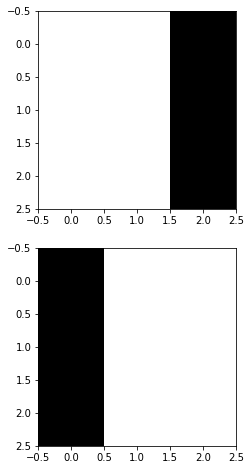

In [33]:
r = 20
x = np.array([[r, r , r/5],
            [r, r, r/5],
            [r, r , r/5]
])
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(5, 8))
ax[0].imshow(x, cmap='gray')
x_conv = ndimage.convolve(x, [[-1, 0, 1]])
x_conv[x_conv > 255] = 255 
x_conv[x_conv < 0] = 0 
ax[1].imshow(x_conv, cmap='gray')
print(x)
print(x_conv)

**Intensifies the difference** between low and high value pixels

## 3 Calculate on Paper:
1. Norm:
\begin{equation*}
    x=
  \begin{bmatrix}
   1+j \\
   2 \\
   1-j
  \end{bmatrix}
  , 
  y=
  \begin{bmatrix}
   1 \\
   -1 \\
   1
  \end{bmatrix}
  \end{equation*}
2. Inner Product of `x` and `y`. Orthonormal?
  
3. Find Degree:
\begin{equation*}
    x=
  \begin{bmatrix}
   1 \\
   j \\
   1-j
  \end{bmatrix}
  , 
  y=
  \begin{bmatrix}
   -1 \\
   -j \\
   j-1
  \end{bmatrix}
  \end{equation*}

### 3.1 Norm


In [298]:
a = np.array([1+1j, 2, 1-1j]).reshape(-1, 1)
np.sqrt(np.vdot(a, a))

(2.8284271247461903+0j)

In [299]:
b = np.array([1, -1, 1]).reshape(-1, 1)
np.sqrt(np.vdot(b, b))

1.7320508075688772

![](wiki/3.1.jpg)

### 3.2 Inner Product

In [290]:
np.vdot(a, b)

0j

They are **orthogonal** not orthonormal.

![](wiki/3.2.jpg)

### 3.3 Find Degree

In [318]:
x = np.array([1, 1j, 1-1j]).reshape(-1, 1)
y = np.array([-1, -1j, 1j-1]).reshape(-1, 1)

xy = np.vdot(x, y)
x_norm = np.sqrt(np.vdot(x, x))
y_norm = np.sqrt(np.vdot(y, y))
theta = np.arccos(xy.real/(x_norm.real* y_norm.real))
theta = theta * 180 / np.pi
theta

180.0

![](wiki/3.3.jpg)

## 4 Implementations
1. Implement `make_gaussian(std, size)`
2. Implement `convolve2d(image, kernel)`
3. Implement `opencv_median_blur(image)` from `cv2`
4. Implement `opencv_gaussian_blur(image, std, size)` from `cv2`
5. Analyze `time` and Results

### 4.1 Implement `make_gaussian(std, size)`

In [254]:
def gaussian(r2, std=1):
    """
    Sample one instance from gaussian distribution regarding
    given squared-distance:r2, standard-deviation:std and general-constant:k

    :param r: squared distance from center of gaussian distribution
    :param std: standard deviation

    :return: A sampled number obtained from gaussian
    """
    return np.exp(-r2/(2.*std**2)) / (2.*np.pi*std**2)

In [260]:
def make_gaussian(size=5, std=1):
    """
    Creates a gaussian kernel regarding given size and std.
    Note that to define interval with respect to the size, 
    I used linear space sampling which may has
    lower accuracy from renowned libraries.

    :param std: standard deviation value
    :param size: size of the output kernel
    :return: A gaussian kernel with size of (size*size)
    """
    size = int(size) // 2
    x, y = np.mgrid[-size:size+1, -size:size+1]
    distance = x**2+ y**2
    kernel = gaussian(r2=distance, std=std)
    return kernel

print(make_gaussian(5, 1))


[[ 0.00291502  0.01306423  0.02153928  0.01306423  0.00291502]
 [ 0.01306423  0.05854983  0.09653235  0.05854983  0.01306423]
 [ 0.02153928  0.09653235  0.15915494  0.09653235  0.02153928]
 [ 0.01306423  0.05854983  0.09653235  0.05854983  0.01306423]
 [ 0.00291502  0.01306423  0.02153928  0.01306423  0.00291502]]


### 4.2 Implement `convolve2d(image, kernel)`

In [113]:
def convolve2d(image, kernel):
    """
    Applies 2D convolution via provided kernel over given image

    :param image: input image in grayscale mode
    :param kernel: kernel of convolution
    :return: A convolved image with 'same' size using zero-padding 
    """
    # you do not need to modify these, but feel free to implement however you know from scratch
    kernel       = np.flipud(np.fliplr(kernel))  # Flip the kernel, if it's symmetric it does not matter
    k = kernel.shape[0]
    padding      = (k - 1)
    offset       = padding // 2
    output       = np.zeros_like(image)
    # Add zero padding to the input image
    image_padded = np.zeros((image.shape[0] + padding, image.shape[1] + padding))   
    image_padded[offset:-offset, offset:-offset] = image

    # implement the convolution inside the inner for loop
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            output[y,x] = np.sum(kernel * image_padded[y:y+k, x:x+k])
    return output

x = np.random.randn(5, 5)
f = np.arange(9).reshape(3 ,3)
scipy_out = ndimage.convolve(x, f, mode='constant', cval=0)
our_out = convolve2d(x, f)

print('Results from scipy and out implementation are same? Answer:\n',scipy_out.astype('uint8') == our_out.astype('uint8'))

Results from scipy and out implementation are same? Answer:
 [[ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]


### 4.3 Implement `opencv_median_blur(image, size)` from `cv2`

**<font color="red">In Open CV, `size` argument also exists and it is mandatory which you omitted.</font>**

In [39]:
import cv2

In [42]:
def opencv_median_blur(image, size):
    """
    Applies median filter regarding given window `size`
    
    :param image: open cv or numpy ndarray image
    :param size: size of median kernel
    :return: An open cv image
    """
    return cv2.medianBlur(image, size)

### 4.4 Implement `opencv_gaussian_blur(image, std, size)` from `cv2`

In [69]:
def opencv_gaussian_blur(image, size, std):
    """
    Applies gaussian filter to smooth image
    
    :param image: Open cv or numpy ndarray image
    :param size: The size of gaussian filter
    :param std: if 0, it will be calculated automatically, otherwise for x and y sould be indicated.
    :return: An open cv image
    """
    return cv2.GaussianBlur(src=image, ksize=(size, size), sigmaX=std, sigmaY=std)

### 4.5 Analyze `time` and Results
<font color="red">In Open CV, `size` argument also exists for `median` and it is mandatory which you omitted so I changed the `for` loop even though you said no to, to add `size=11` to `median`.</font>
 The reason I chose `11` is that in gaussian you used `11` too.
 
<font color="brown">You had a type: `cv` should be `cv2` in codes</font>

In [75]:
import os
import time

In [262]:
src_path = 'images_noisy/'
dst_path = 'images_filtered/'
names = os.listdir(src_path)

# Do not modify these for loops
for name in names:
    # load image
    src_name = src_path + name
    image = cv2.imread(src_name, cv2.IMREAD_GRAYSCALE)

    # gaussian blur using your implementation
    start = time.time()
    kernel1 = make_gaussian(std=1, size=11)
    blur1 = convolve2d(image, kernel1)
    dt1 = time.time() - start
    dst_name1 = dst_path + name + '.bmp'
    cv2.imwrite(dst_name1, blur1)
    
    # gaussian blur using opencv implementation
    start = time.time()
    blur2 = opencv_gaussian_blur(image, std=1, size=11)
    dt2 = time.time() - start
    dst_name2 = dst_path + name + '_CV.bmp'
    cv2.imwrite(dst_name2, blur2)
    
    # median blur 
    start = time.time()
    blur3 = opencv_median_blur(image, 11)  ################# THIS CODE ONLY WORKS IF `SIZE` being provided.
    dt3 = time.time() - start
    dst_name3 = dst_path + name + '_median.bmp'
    cv2.imwrite(dst_name3, blur3)
    print('Our gaussian time:{}, opencv gaussian time:{}, opencv median time:{}'.format(dt1, dt2, dt3))

Our gaussian time:1.588090181350708, opencv gaussian time:0.0009992122650146484, opencv median time:0.004996776580810547
Our gaussian time:1.8719286918640137, opencv gaussian time:0.0, opencv median time:0.003996610641479492
Our gaussian time:2.5495409965515137, opencv gaussian time:0.0010004043579101562, opencv median time:0.009994029998779297
Our gaussian time:1.4371778964996338, opencv gaussian time:0.0009999275207519531, opencv median time:0.004997730255126953


##### Comparing Time Consumption
First of all, our implementation time is much bigger that open cv's and it is completely obvious. If we want to compare gaussian, out convolution2d function has not been implemented efficiently which the main reason is the 2 `for` loops for iterating over image and computing convolution. The other reason is that opencv's core is in C++ and we know that it is much faster (3x) even from efficient pure python code.

But if want to compare gaussian and median time, we can say that median operation is ordered and needs sorting everytime and furthermore, it cannot be implemented using kernel logics which means most of the optimizations related to parallel computing or efficient vectorization will be lost, so that is why we can see an explotion about 10x increase in time.

Note: As you can see one of the times are `0.0` and that is because `time` module cannot handle very small numbers in small code snippets, so usually [timeit](https://docs.python.org/3/library/timeit.html) module is prefered.

##### Comparing Quality


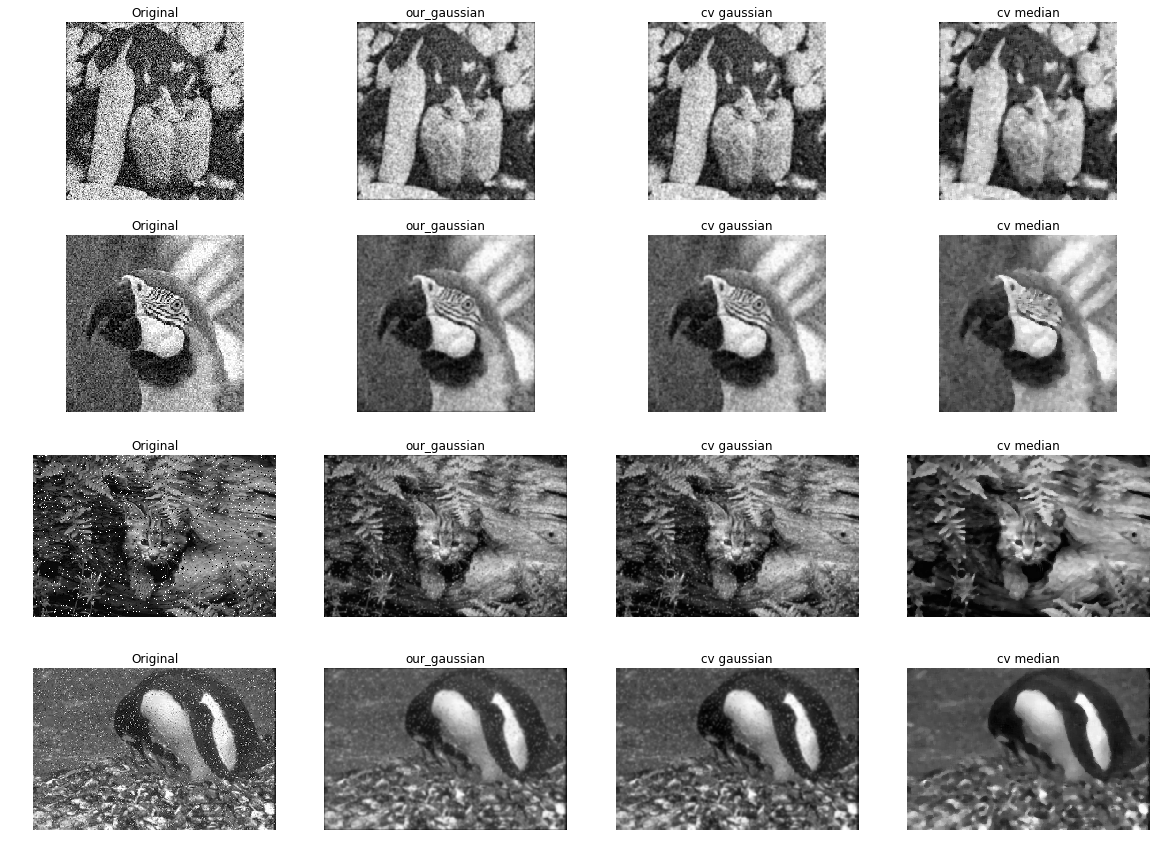

In [271]:
src_path = 'images_noisy/'
dst_path = 'images_filtered/'
names = os.listdir(src_path)

fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(20, 15))
# Do not modify these for loops
for idx, name in enumerate(names):
    # load image
    src_name = src_path + name
    image = cv2.imread(src_name, cv2.IMREAD_GRAYSCALE)
    
    # gaussian blur using your implementation
    kernel1 = make_gaussian(std=1, size=11)
    blur1 = convolve2d(image, kernel1)
    
    # gaussian blur using opencv implementation
    blur2 = opencv_gaussian_blur(image, std=1, size=25)
    
    # median blur 
    blur3 = opencv_median_blur(image, 5)
    
    # plotting
    ax[idx, 0].set_title('Original')
    ax[idx, 1].set_title('our_gaussian')
    ax[idx, 2].set_title('cv gaussian')
    ax[idx, 3].set_title('cv median')
    ax[idx, 0].axis('off')
    ax[idx, 1].axis('off')
    ax[idx, 2].axis('off')
    ax[idx, 3].axis('off')
    
    ax[idx, 0].imshow(image, cmap='gray')
    ax[idx, 1].imshow(blur1, cmap='gray')
    ax[idx, 2].imshow(blur2, cmap='gray')
    ax[idx, 3].imshow(blur3, cmap='gray')

First two row of images correspond to the images with normal noise. So A gaussian blur can easily handle this kind of noises by reducing the frequnecy between pixels in the vicinity of each other without making image to blury. But median, cannot find the good pixel to retain information without making the image completely blury, because the noise is distributed almost between all values so median cannot do much and as you can see in the last column of the two first row, images are just blury without removing noise.

But about the latter second rows, we can see the salt and pepper noise and this time, gaussian cannot do much because when it tries to decrease intensification, the output of convolution consists of 0 or 255 values and they will simply dominate other values so the output will be a blury image without removing salt or peppers. They are still completely visible.
But when we have such a noise in our images, we know they are minority in number so taking median, will focus on pixels that are more common in each window, so 0 or 255 values will not effect in median operation because they are almost rare in each window, so the output of images using this median filter will be blury image without salt and peppers.